In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To learn about support vector machines, start with the simplest technique: linear support vector binary classifiers. This modeling technique will provide decent performance as well as a solid gateway into more advanced SVM techniques.

Now, look at some data that you might want to classify. Imagine that you have some data from a course; you know the test scores, project scores, and whether each student passed or failed the course.

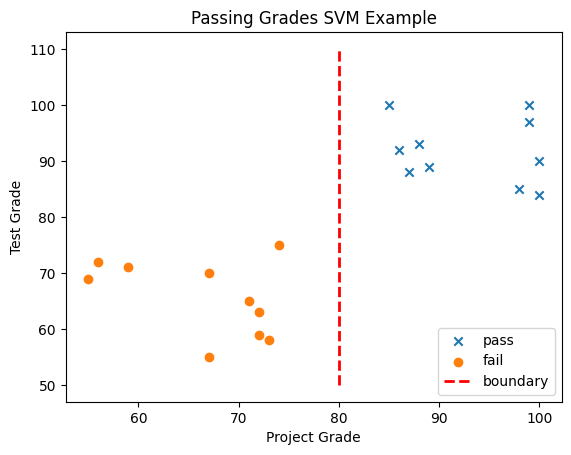

In [8]:
# Example data
test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']

# Reusable function to plot the data
def setup_plot():
    plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
    plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')

    # Eyeball a pass-fail line to split the points
    plt.plot([80, 80], [50, 110], 'r--', lw=2)

    plt.xlabel('Project Grade')
    plt.ylabel('Test Grade')

setup_plot()
plt.legend(['pass', 'fail', 'boundary'], loc=4)
plt.title('Passing Grades SVM Example')
plt.show()


In the plot above, you eyeballed a straight-line decision boundary between the pass and fail data points. But is this the best possible boundary line for making predictions? Consider some other options:

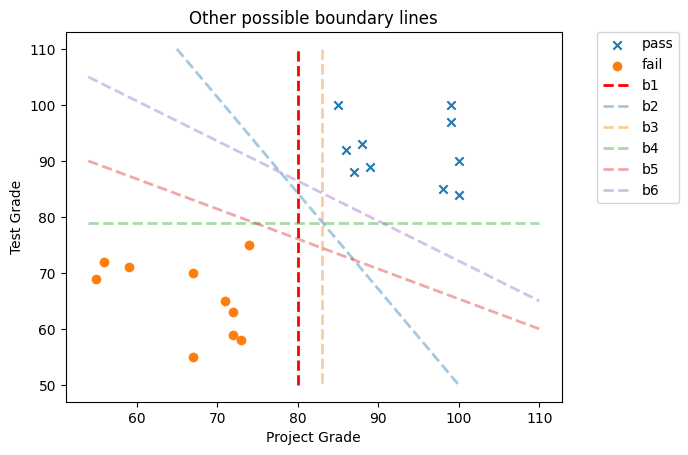

In [9]:
# Throw some other possible boundary lines into the mix

# Rebuild the previous plot
setup_plot()

# Add some new boundary lines
plt.plot([65, 100], [110, 50], '--', lw=2, alpha=0.4) #b2
plt.plot([83, 83], [110, 50], '--', lw=2, alpha=0.4) #b3
plt.plot([54, 110], [79, 79], '--', lw=2, alpha=0.4) #b4
plt.plot([54, 110], [90, 60], '--', lw=2, alpha=0.4) #b5
plt.plot([54, 110], [105, 65], '--', lw=2, alpha=0.4) #b6

plt.legend(['pass', 'fail','b1', 'b2', 'b3', 'b4', 'b5', 'b6'],
            bbox_to_anchor=(0.25, 0.02, 1, 1))
plt.title('Other possible boundary lines')
plt.show()

Are any of these new boundary lines better than the first attempt? Which color looks best to you? Why?

## Margin and support vectors

You probably have an intuition that a boundary line passing close to data points is bad because it'll be susceptible to noise and worse at predicting new data points than a boundary line farther away. In SVM, you formalize that intuition by defining the *margin* **as the distance between the nearest point of each class and the boundary**.

Finding the margin for the initial red boundary line is easy. The nearest point for each class is at `(85,100)` and `(74,75)`. These nearest points are the *support vectors* that the model is named after. The distance from the support vectors to the red boundary line is just the horizontal distance (because the boundary happens to be vertical). The margin is `5` from the pass support vector and `6` from the fail support vector.

That isn't the best possible boundary line, though. Several of the other boundary lines are worse, like the orange boundary line, *b3*. But looking at the light blue boundary line, *b2*, you probably don't need to do the math to be able to see that the margin is larger—so it's a better boundary than the initial red boundary. The goal of SVM is to find the _best_ boundary, which is the boundary that optimizes the margin.


## Finding the optimal boundary

Now, use scikit-learn to find the actual optimal boundary line. You're doing a linear SVM example, so you'll force the boundary to be linear. To do this, use `SVC` (which stands for *support vector classifier*) with a linear kernel. You'll get into what an SVC is and explore some other options later.

In [10]:
from sklearn.svm import SVC

# Instantiate your model and fit the data
X = test_data[['test', 'project']]
Y = test_data['pass']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(kernel='linear')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


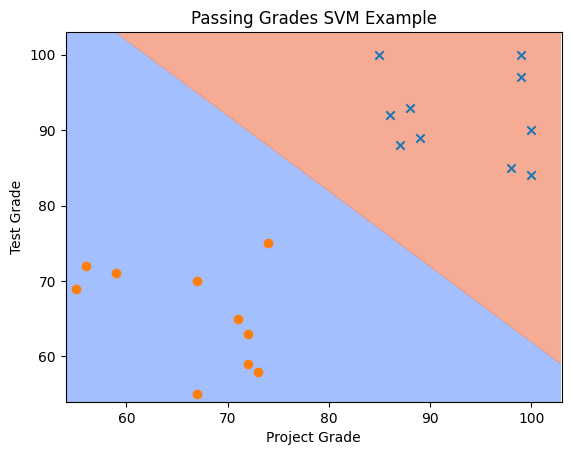

In [11]:
# Visualize your model
y_min, y_max = X.test.min() - 1, X.test.max() + 3
x_min, x_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

Z = (svm.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades SVM Example')
plt.show()

That looks pretty much as you might expect. You can see a nice clear division between the two classes, with a maximum distance between the support vectors and the decision boundary. Way to go!

## Things get messy

This is a nice example, but there are several things about it that are far simpler than anything that you're likely to run into in the wild.

This dataset is in two dimensions, but SVM works in as many dimensions as you'd like (given the limitations of your computing resources). Therefore, the boundary between two groups isn't always a
line. A line is simply the way to represent this boundary in two dimensions. In general terms, the boundary is always a *hyperplane*.

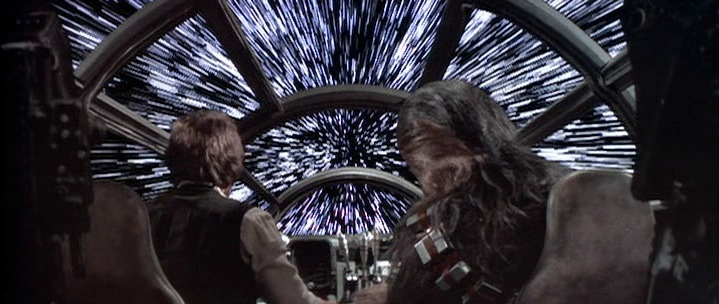

No, that's a picture of hyper*drive*!

A *hyperplane* in n-dimensional space is an n-minus-one-dimensional space. So for a 2D plane like the one in this example, a hyperplane is a 1D line. In 3D space, the hyperplane is a 2D plane. In 4D spacetime, a hyperplane is a 3D space. It gets tricky to visualize from here, but the concept continues in any number of dimensions.

Also of note is that this dataset has a boundary that groups each observation exclusively on one side of the line. This is called a _hard margin_. It won't always be possible to make a boundary with a hard margin, however. When it's not, the problem is called a _soft margin_. (These two terms apply to all classifiers, by the way.)

To deal with this kind of problem, SVM imposes a cost function. The cost function gives SVM two things to balance: the size of the margin (which it wants to maximize) and the cumulative distance of points on the wrong side of the margin from the boundary (which it wants to minimize).

How SVM balances these factors is complex, and understanding the vector math behind it isn't essential. What _is_ important to know is that you can control the priorities of this tradeoff by controlling that weight. How you want to tune it depends on your tolerance for inaccurate results as compared to large margins.